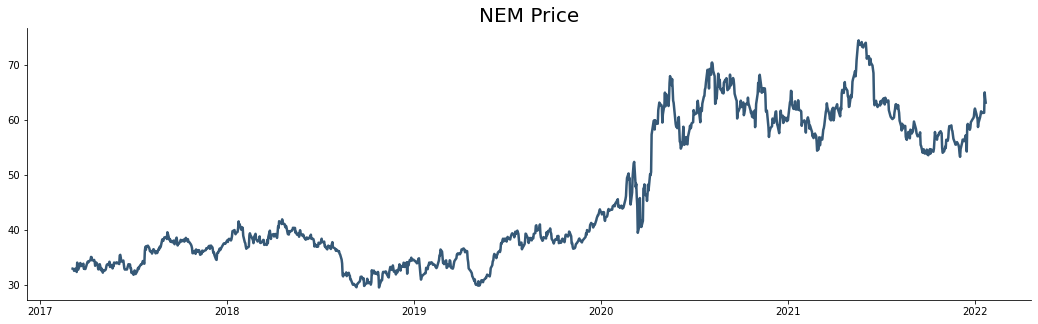

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load
df = pd.read_csv('NEM.csv', index_col='Date', parse_dates=True)

# Visualize
plt.title('NEM Price', size=20)
plt.plot(df);

In [2]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.metrics import mean_squared_error

In [3]:
df

,NEM
Date,
2017-03-06,33.01
2017-03-07,32.98
2017-03-08,32.89
2017-03-09,32.60
2017-03-10,32.94
...,...
2022-01-14,61.22
2022-01-18,61.25
2022-01-19,64.95


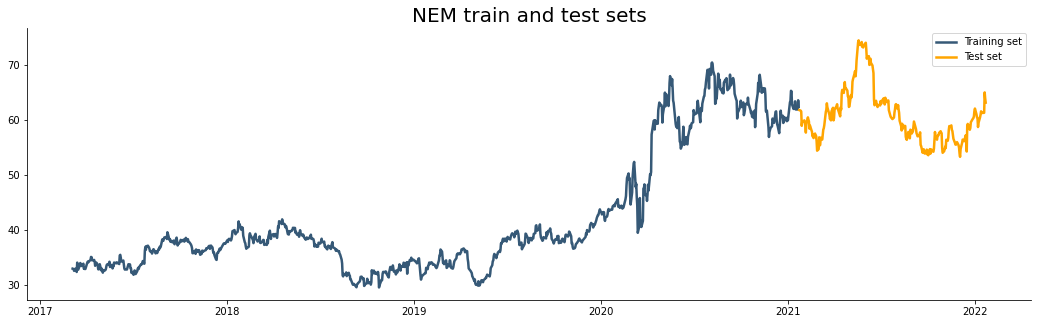

In [4]:
test_size = 253


df_train = df[:-test_size]
df_test = df[-test_size:]

plt.title('NEM train and test sets', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='orange')
plt.legend();

In [5]:
from fbprophet import Prophet as proph

In [6]:
df_train

,NEM
Date,
2017-03-06,33.01
2017-03-07,32.98
2017-03-08,32.89
2017-03-09,32.60
2017-03-10,32.94
...,...
2021-01-14,63.33
2021-01-15,61.86
2021-01-19,61.85


In [7]:
df_train.reset_index(inplace=True)

In [8]:
df_test

,NEM
Date,
2021-01-22,61.75
2021-01-25,61.64
2021-01-26,61.48
2021-01-27,58.89
2021-01-28,59.73
...,...
2022-01-14,61.22
2022-01-18,61.25
2022-01-19,64.95


In [9]:
df_test.reset_index(inplace=True)

In [10]:
# Rename the columns [Date,AAPL] to [ds, y]

ts = df_train

ts = df_train.rename(columns={'Date': 'ds',
                        'NEM': 'y'})

ts_test = df_test.rename(columns={'Date': 'ds',
                        'NEM': 'y'})
ts.head(5)


,ds,y
0,2017-03-06,33.01
1,2017-03-07,32.98
2,2017-03-08,32.89
3,2017-03-09,32.60
4,2017-03-10,32.94


In [11]:
x_test = ts_test[['ds']]

In [12]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model = proph(interval_width=0.95,daily_seasonality=True)

In [13]:
# Fit the timeseries into Model
Model.fit(ts)

In [14]:
# USe make_future_dataframe with a monthly frequency and periods = 759 for 3 years
future_dates = Model.make_future_dataframe(periods=759, freq='D')
future_dates.tail()


,ds
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18
1736,2023-02-19


In [15]:
future_dates

,ds
0,2017-03-06
1,2017-03-07
2,2017-03-08
3,2017-03-09
4,2017-03-10
...,...
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18


In [16]:
future_dates= future_dates.loc[future_dates['ds'] >= '2021-01-22']

In [17]:
x_test = pd.DataFrame(x_test)

In [18]:
x_test

,ds
0,2021-01-22
1,2021-01-25
2,2021-01-26
3,2021-01-27
4,2021-01-28
...,...
248,2022-01-14
249,2022-01-18
250,2022-01-19
251,2022-01-20


In [19]:
# Predict the values for future dates and take the head of forecast

predicitons = Model.predict(x_test)


In [20]:
forecast = Model.predict(future_dates)

In [21]:
forecast.tail() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
754,2023-02-15,96.072561,2.603537,183.902215,5.059156,185.466232,-1.611231,-1.611231,-1.611231,0.928679,...,0.015580,0.015580,0.015580,-2.555489,-2.555489,-2.555489,0.0,0.0,0.0,94.461330
755,2023-02-16,96.112510,1.956219,183.554951,4.981011,185.685109,-1.507361,-1.507361,-1.507361,0.928679,...,0.038747,0.038747,0.038747,-2.474787,-2.474787,-2.474787,0.0,0.0,0.0,94.605149
756,2023-02-17,96.152459,3.214844,184.690945,4.902867,185.903985,-1.401504,-1.401504,-1.401504,0.928679,...,0.055448,0.055448,0.055448,-2.385631,-2.385631,-2.385631,0.0,0.0,0.0,94.750955
757,2023-02-18,96.192408,1.639176,183.425374,4.824722,186.122992,-1.477325,-1.477325,-1.477325,0.928679,...,-0.116085,-0.116085,-0.116085,-2.289919,-2.289919,-2.289919,0.0,0.0,0.0,94.715083
758,2023-02-19,96.232358,1.398087,184.870073,4.746577,186.342547,-1.377246,-1.377246,-1.377246,0.928679,...,-0.116085,-0.116085,-0.116085,-2.189839,-2.189839,-2.189839,0.0,0.0,0.0,94.855112


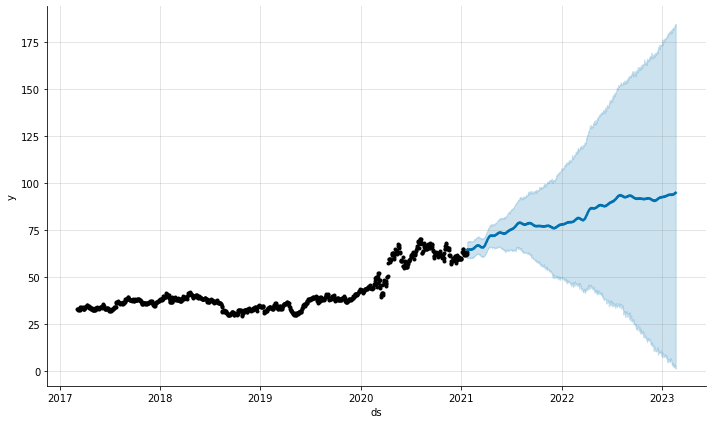

In [22]:
# Use prophet's plot function to plot the predictions

Model.plot(forecast, uncertainty=True)
plt.show()

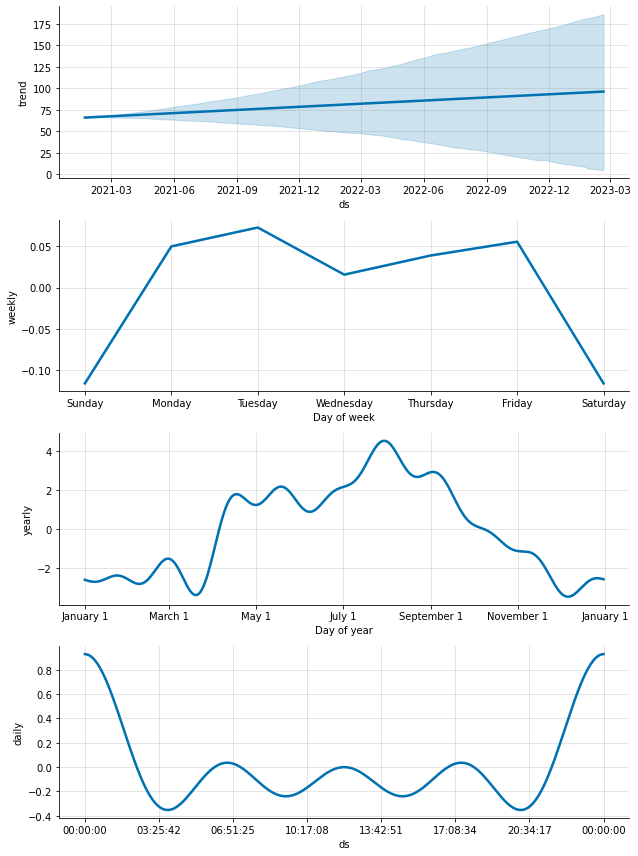

In [23]:
Model.plot_components(forecast)
plt.show()

In [24]:
df_test = pd.concat([df_test,predicitons], axis=1)
df_test

,Date,NEM,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,61.75,2021-01-22,65.950831,60.629269,68.973481,65.950831,65.950831,-1.395479,-1.395479,...,0.055448,0.055448,0.055448,-2.379606,-2.379606,-2.379606,0.0,0.0,0.0,64.555353
1,2021-01-25,61.64,2021-01-25,66.070679,60.399549,68.963368,66.059275,66.074610,-1.400326,-1.400326,...,0.049757,0.049757,0.049757,-2.378762,-2.378762,-2.378762,0.0,0.0,0.0,64.670353
2,2021-01-26,61.48,2021-01-26,66.110628,60.311935,69.158467,66.093528,66.125294,-1.391772,-1.391772,...,0.072637,0.072637,0.072637,-2.393088,-2.393088,-2.393088,0.0,0.0,0.0,64.718856
3,2021-01-27,58.89,2021-01-27,66.150578,60.468216,68.684211,66.118514,66.177129,-1.470211,-1.470211,...,0.015580,0.015580,0.015580,-2.414469,-2.414469,-2.414469,0.0,0.0,0.0,64.680367
4,2021-01-28,59.73,2021-01-28,66.190527,60.261232,69.059822,66.145431,66.239517,-1.474907,-1.474907,...,0.038747,0.038747,0.038747,-2.442333,-2.442333,-2.442333,0.0,0.0,0.0,64.715620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,61.22,2022-01-14,80.212711,50.974277,110.906137,52.016970,112.017082,-1.616040,-1.616040,...,0.055448,0.055448,0.055448,-2.600167,-2.600167,-2.600167,0.0,0.0,0.0,78.596671
249,2022-01-18,61.25,2022-01-18,80.372508,51.165133,111.012117,51.925323,112.882337,-1.472770,-1.472770,...,0.072637,0.072637,0.072637,-2.474085,-2.474085,-2.474085,0.0,0.0,0.0,78.899739
250,2022-01-19,64.95,2022-01-19,80.412457,50.640112,112.435658,51.892393,113.098650,-1.500650,-1.500650,...,0.015580,0.015580,0.015580,-2.444908,-2.444908,-2.444908,0.0,0.0,0.0,78.911807
251,2022-01-20,63.84,2022-01-20,80.452407,50.138596,112.103709,51.777226,113.239066,-1.451762,-1.451762,...,0.038747,0.038747,0.038747,-2.419188,-2.419188,-2.419188,0.0,0.0,0.0,79.000644


In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,65.950831,60.201084,68.775512,65.950831,65.950831,-1.395479,-1.395479,-1.395479,0.928679,...,0.055448,0.055448,0.055448,-2.379606,-2.379606,-2.379606,0.0,0.0,0.0,64.555353
1,2021-01-23,65.990781,60.118380,68.724517,65.990781,65.990781,-1.559558,-1.559558,-1.559558,0.928679,...,-0.116085,-0.116085,-0.116085,-2.372152,-2.372152,-2.372152,0.0,0.0,0.0,64.431222
2,2021-01-24,66.030730,60.403082,69.128328,66.025703,66.030730,-1.559188,-1.559188,-1.559188,0.928679,...,-0.116085,-0.116085,-0.116085,-2.371782,-2.371782,-2.371782,0.0,0.0,0.0,64.471542
3,2021-01-25,66.070679,60.200074,69.121506,66.055591,66.071181,-1.400326,-1.400326,-1.400326,0.928679,...,0.049757,0.049757,0.049757,-2.378762,-2.378762,-2.378762,0.0,0.0,0.0,64.670353
4,2021-01-26,66.110628,60.020599,68.900471,66.084542,66.117208,-1.391772,-1.391772,-1.391772,0.928679,...,0.072637,0.072637,0.072637,-2.393088,-2.393088,-2.393088,0.0,0.0,0.0,64.718856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2023-02-15,96.072561,2.603537,183.902215,5.059156,185.466232,-1.611231,-1.611231,-1.611231,0.928679,...,0.015580,0.015580,0.015580,-2.555489,-2.555489,-2.555489,0.0,0.0,0.0,94.461330
755,2023-02-16,96.112510,1.956219,183.554951,4.981011,185.685109,-1.507361,-1.507361,-1.507361,0.928679,...,0.038747,0.038747,0.038747,-2.474787,-2.474787,-2.474787,0.0,0.0,0.0,94.605149
756,2023-02-17,96.152459,3.214844,184.690945,4.902867,185.903985,-1.401504,-1.401504,-1.401504,0.928679,...,0.055448,0.055448,0.055448,-2.385631,-2.385631,-2.385631,0.0,0.0,0.0,94.750955
757,2023-02-18,96.192408,1.639176,183.425374,4.824722,186.122992,-1.477325,-1.477325,-1.477325,0.928679,...,-0.116085,-0.116085,-0.116085,-2.289919,-2.289919,-2.289919,0.0,0.0,0.0,94.715083


In [26]:
mean_squared_error(df_test.NEM,df_test.yhat,squared=False)

15.483389601182543

In [27]:
ROI = (63.09/96.232358)*100
ROI

65.5600686829268

# Concating EPAM DF

In [28]:
concat_df = forecast.loc[forecast['ds'] >= '2022-01-29'][['ds','yhat']]
concat_df

,ds,yhat
372,2022-01-29,79.157559
373,2022-01-30,79.160493
374,2022-01-31,79.325714
375,2022-02-01,79.345890
376,2022-02-02,79.285681
...,...,...
754,2023-02-15,94.461330
755,2023-02-16,94.605149
756,2023-02-17,94.750955
757,2023-02-18,94.715083


In [29]:
concat_df.set_index('ds',inplace=True)

In [30]:
concat_df

,yhat
ds,
2022-01-29,79.157559
2022-01-30,79.160493
2022-01-31,79.325714
2022-02-01,79.345890
2022-02-02,79.285681
...,...
2023-02-15,94.461330
2023-02-16,94.605149
2023-02-17,94.750955


In [31]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 2022-01-29 to 2023-02-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yhat    387 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [32]:
concat_df.columns = ['y']

In [33]:
df_test

,Date,NEM,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,61.75,2021-01-22,65.950831,60.629269,68.973481,65.950831,65.950831,-1.395479,-1.395479,...,0.055448,0.055448,0.055448,-2.379606,-2.379606,-2.379606,0.0,0.0,0.0,64.555353
1,2021-01-25,61.64,2021-01-25,66.070679,60.399549,68.963368,66.059275,66.074610,-1.400326,-1.400326,...,0.049757,0.049757,0.049757,-2.378762,-2.378762,-2.378762,0.0,0.0,0.0,64.670353
2,2021-01-26,61.48,2021-01-26,66.110628,60.311935,69.158467,66.093528,66.125294,-1.391772,-1.391772,...,0.072637,0.072637,0.072637,-2.393088,-2.393088,-2.393088,0.0,0.0,0.0,64.718856
3,2021-01-27,58.89,2021-01-27,66.150578,60.468216,68.684211,66.118514,66.177129,-1.470211,-1.470211,...,0.015580,0.015580,0.015580,-2.414469,-2.414469,-2.414469,0.0,0.0,0.0,64.680367
4,2021-01-28,59.73,2021-01-28,66.190527,60.261232,69.059822,66.145431,66.239517,-1.474907,-1.474907,...,0.038747,0.038747,0.038747,-2.442333,-2.442333,-2.442333,0.0,0.0,0.0,64.715620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,61.22,2022-01-14,80.212711,50.974277,110.906137,52.016970,112.017082,-1.616040,-1.616040,...,0.055448,0.055448,0.055448,-2.600167,-2.600167,-2.600167,0.0,0.0,0.0,78.596671
249,2022-01-18,61.25,2022-01-18,80.372508,51.165133,111.012117,51.925323,112.882337,-1.472770,-1.472770,...,0.072637,0.072637,0.072637,-2.474085,-2.474085,-2.474085,0.0,0.0,0.0,78.899739
250,2022-01-19,64.95,2022-01-19,80.412457,50.640112,112.435658,51.892393,113.098650,-1.500650,-1.500650,...,0.015580,0.015580,0.015580,-2.444908,-2.444908,-2.444908,0.0,0.0,0.0,78.911807
251,2022-01-20,63.84,2022-01-20,80.452407,50.138596,112.103709,51.777226,113.239066,-1.451762,-1.451762,...,0.038747,0.038747,0.038747,-2.419188,-2.419188,-2.419188,0.0,0.0,0.0,79.000644


In [34]:
df2 = df_test[['Date','NEM']]

In [35]:
df2.set_index('Date',inplace=True)

In [36]:
temp_ds = ts.set_index('ds')

In [37]:
df2.columns = ['y']

In [38]:
final_df= pd.concat([temp_ds,df2,concat_df])
final_df

,y
2017-03-06,33.010000
2017-03-07,32.980000
2017-03-08,32.890000
2017-03-09,32.600000
2017-03-10,32.940000
...,...
2023-02-15,94.461330
2023-02-16,94.605149
2023-02-17,94.750955
2023-02-18,94.715083


In [39]:
final_df.to_csv('NEM_final.csv')

In [40]:
concat_df = forecast.loc[forecast['ds'] >= '2022-01-29'][['ds','yhat']]
concat_df

concat_df.set_index('ds',inplace=True)

concat_df

concat_df.info()

concat_df.columns = ['y']

df_test

df2 = df_test[['Date','NEM']]

df2.set_index('Date',inplace=True)

temp_ds = ts.set_index('ds')

df2.columns = ['y']

final_df= pd.concat([temp_ds,df2,concat_df])
final_df

final_df.to_csv('NEM_final.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 2022-01-29 to 2023-02-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yhat    387 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [41]:
final_df

,y
2017-03-06,33.010000
2017-03-07,32.980000
2017-03-08,32.890000
2017-03-09,32.600000
2017-03-10,32.940000
...,...
2023-02-15,94.461330
2023-02-16,94.605149
2023-02-17,94.750955
2023-02-18,94.715083
